# Large-Scale Unconstrained Optimization

In [18]:
import sys

sys.path.append('..')

### 1. Newton-CG Line Search Method

##### Example #1.1

$f(x) = (x - 2)^2$

$f'(x) = 2(x-2)$

$f''(x) = 2 > 0, \forall x$

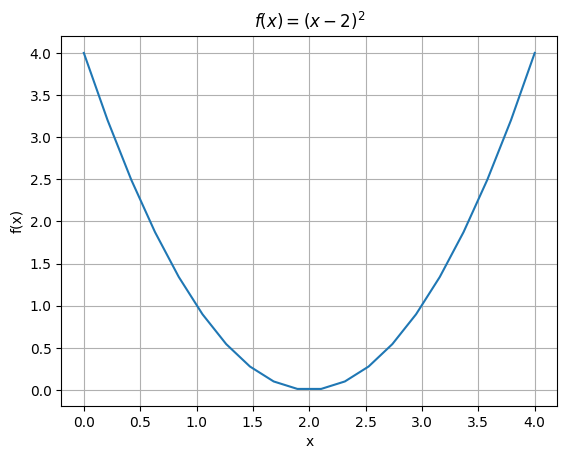

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def f(x: np.ndarray[np.double]) -> np.double:
    return (x[0] - 2.)**2

x = np.linspace(0, 4, 20)
y = [f([t]) for t in x]

plt.xlabel('x')
plt.grid(True)
plt.plot(x, y)
plt.title('$f(x) = (x-2)^2$')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [20]:
from scipy.sparse import csr_matrix
from modules.optimize.unconstrained.line_search.newton_cg import newton_cg as line_search_newton_cg

def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([2*(x[0] - 2)])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([[2]])

x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([0.]), 
    10**-9,
    100
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f"Derivative f'(x): {df(x)}")
print(f"Second derivative f''(x): {d2f(x).toarray()[0][0]}")

Solution: [2.]
Number of iterations: 2
Derivative f'(x): [0.]
Second derivative f''(x): 2


##### Example #1.2

$f(x) = x^6 - x^4$

$f'(x) = 6x^5 - 4x^3$

$f''(x) = 30x^4 - 12x^2$

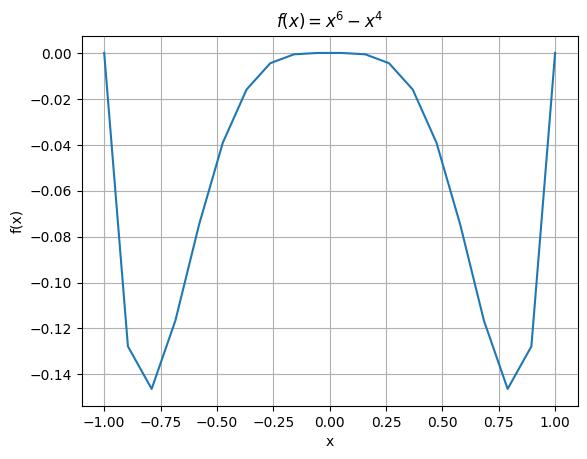

In [21]:
def f(x: np.ndarray[np.double]) -> np.double:
    return x[0]**6 - x[0]**4

x = np.linspace(-1, 1, 20)
y = [f([t]) for t in x]

plt.xlabel('x')
plt.grid(True)
plt.plot(x, y)
plt.title('$f(x) = x^6 - x^4$')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [22]:
def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([x[0]**3*(6*x[0]**2 - 4)])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([[30*x[0]**4 - 12*x[0]**2]])

x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([0.]), 
    10**-9,
    100
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f"Derivative f'(x): {df(x)}")
print(f"Second derivative f''(x): {d2f(x).toarray()[0][0]}")

Solution: [0.]
Number of iterations: 1
Derivative f'(x): [-0.]
Second derivative f''(x): 0.0


In [23]:
x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([0.01]), 
    10**-9,
    100
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f"Derivative f'(x): {df(x)}")
print(f"Second derivative f''(x): {d2f(x).toarray()[0][0]}")

Solution: [0.01042084]
Number of iterations: 100
Derivative f'(x): [-4.52582281e-06]
Second derivative f''(x): -0.0013027733374620174


In [24]:
x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([0.1]), 
    10**-9,
    100
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f"Derivative f'(x): {df(x)}")
print(f"Second derivative f''(x): {d2f(x).toarray()[0][0]}")

Solution: [0.81649658]
Number of iterations: 21
Derivative f'(x): [3.80200213e-11]
Second derivative f''(x): 5.333333333659285


##### Example #1.3

$f(x,y) = (1-x)^2 + 100(y-x^2)^2$

$\nabla f(x,y) = \begin{bmatrix}
2(x - 1) -400x(y - x^2) \\
200(y - x^2) \\
\end{bmatrix}$

$\nabla^2 f(x,y) = \begin{bmatrix}
2 - 400y + 1200x^2 & -400x \\
-400x & 200 \\
\end{bmatrix}$

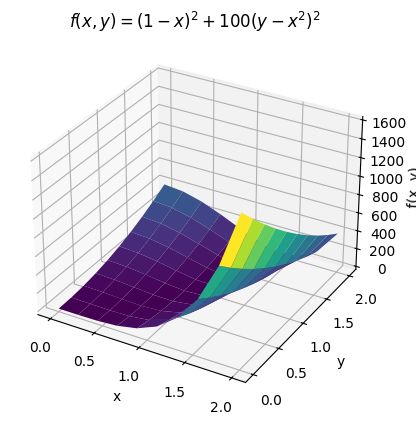

In [25]:
def f(x: np.ndarray[np.double]) -> np.double:
    return (1. - x[0])**2 + 100 * (x[1] - x[0]**2)**2

x = np.linspace(0, 2, 10)
y = np.linspace(0, 2, 10)

X, Y = np.meshgrid(x, y)

Z = f([X, Y])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title("$f(x,y) = (1-x)^2 + 100(y-x^2)^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

plt.show()

In [26]:
def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([
        -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
        200*(x[1] - x[0]**2)
    ])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([
        [2 - 400*x[1] + 1200*x[0]**2, -400*x[0]],
        [-400*x[0], 200]
    ])

x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([2., 0.]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [1. 1.]
Number of iterations: 17
Gradient of f(x, y): [ 4.93625141e-11 -2.47801779e-11]
Eigenvalues of Hessian f(x,y): [3.99360767e-01 1.00160064e+03]


In [27]:
x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([0., 0.]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [1. 1.]
Number of iterations: 20
Gradient of f(x, y): [ 6.81144030e-12 -3.41948692e-12]
Eigenvalues of Hessian f(x,y): [3.99360767e-01 1.00160064e+03]


##### Example #1.4

$f(x,y) = x^4 - x^2 + y^2$

$\nabla f(x,y) = \begin{bmatrix}
4x^3 - 2x \\
2y \\
\end{bmatrix}$

$\nabla^2 f(x,y) = \begin{bmatrix}
12x^2 - 2 & 0 \\
0 & 2 \\
\end{bmatrix}$

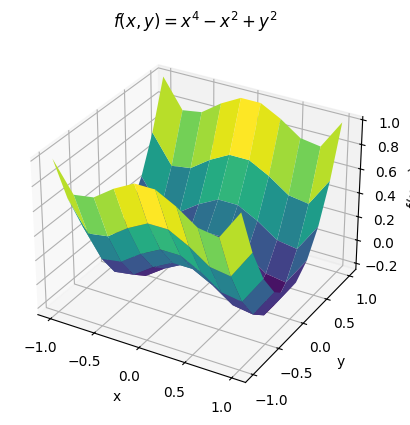

In [28]:
def f(x: np.ndarray[np.double]) -> np.double:
    return x[0]**4 - x[0]**2 + x[1]**2

x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)

X, Y = np.meshgrid(x, y)

Z = f([X, Y])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title("$f(x,y) = x^4 - x^2 + y^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

plt.show()

In [ ]:
def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([
        4*x[0]**3 - 2*x[0],
        2*x[1]
    ])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([
        [12*x[0]**2 - 2, 0],
        [0, 2]
    ])

x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([0., 0.]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [0. 0.]
Number of iterations: 1
Gradient of f(x, y): [0. 0.]
Eigenvalues of Hessian f(x,y): [-2.  2.]


In [ ]:
x, iter = line_search_newton_cg(
    f, df, d2f,
    np.array([0.000001, 0.000001]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [0.70710678 0.        ]
Number of iterations: 8
Gradient of f(x, y): [4.37909708e-11 0.00000000e+00]
Eigenvalues of Hessian f(x,y): [4. 2.]


### 2. Trust Region Newton-CG Method

##### Example #2.1

$f(x) = (x - 2)^2$

$f'(x) = 2(x-2)$

$f''(x) = 2 > 0, \forall x$

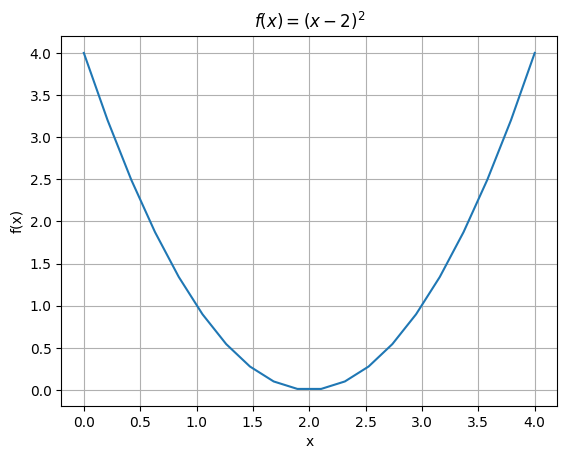

In [31]:
def f(x: np.ndarray[np.double]) -> np.double:
    return (x[0] - 2.)**2

x = np.linspace(0, 4, 20)
y = [f([t]) for t in x]

plt.xlabel('x')
plt.grid(True)
plt.plot(x, y)
plt.title('$f(x) = (x-2)^2$')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [32]:
from modules.optimize.unconstrained.trust_region.newton_cg import newton_cg as trust_region_newton_cg

def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([2*(x[0] - 2)])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([[2]])

x, iter = trust_region_newton_cg(
    f, df, d2f,
    np.array([0.]), 
    10**-9,
    100
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f"Derivative f'(x): {df(x)}")
print(f"Second derivative f''(x): {d2f(x).toarray()[0][0]}")

Solution: [2.]
Number of iterations: 3
Derivative f'(x): [0.]
Second derivative f''(x): 2


##### Example #2.2

$f(x) = x^6 - x^4$

$f'(x) = 6x^5 - 4x^3$

$f''(x) = 30x^4 - 12x^2$

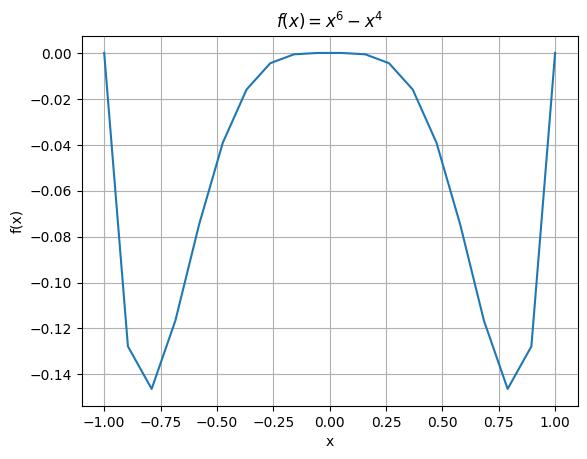

In [33]:
def f(x: np.ndarray[np.double]) -> np.double:
    return x[0]**6 - x[0]**4

x = np.linspace(-1, 1, 20)
y = [f([t]) for t in x]

plt.xlabel('x')
plt.grid(True)
plt.plot(x, y)
plt.title('$f(x) = x^6 - x^4$')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [34]:
def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([x[0]**3*(6*x[0]**2 - 4)])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([[30*x[0]**4 - 12*x[0]**2]])

x, iter = trust_region_newton_cg(
    f, df, d2f,
    np.array([0.]), 
    10**-9,
    100
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f"Derivative f'(x): {df(x)}")
print(f"Second derivative f''(x): {d2f(x).toarray()[0][0]}")

Solution: [0.]
Number of iterations: 1
Derivative f'(x): [-0.]
Second derivative f''(x): 0.0


In [35]:
x, iter = trust_region_newton_cg(
    f, df, d2f,
    np.array([0.01]), 
    10**-9,
    100
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f"Derivative f'(x): {df(x)}")
print(f"Second derivative f''(x): {d2f(x).toarray()[0][0]}")

Solution: [0.81649658]
Number of iterations: 6
Derivative f'(x): [0.]
Second derivative f''(x): 5.333333333333334


##### Example #2.3

$f(x,y) = (1-x)^2 + 100(y-x^2)^2$

$\nabla f(x,y) = \begin{bmatrix}
2(x - 1) -400x(y - x^2) \\
200(y - x^2) \\
\end{bmatrix}$

$\nabla^2 f(x,y) = \begin{bmatrix}
2 - 400y + 1200x^2 & -400x \\
-400x & 200 \\
\end{bmatrix}$

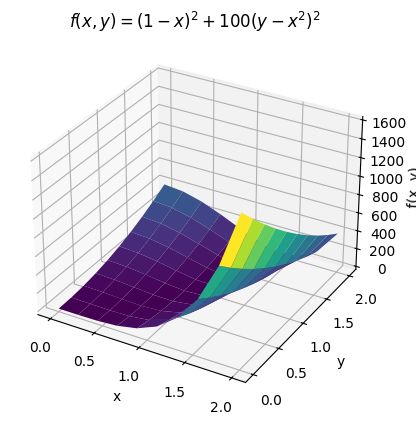

In [36]:
def f(x: np.ndarray[np.double]) -> np.double:
    return (1. - x[0])**2 + 100 * (x[1] - x[0]**2)**2

x = np.linspace(0, 2, 10)
y = np.linspace(0, 2, 10)

X, Y = np.meshgrid(x, y)

Z = f([X, Y])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title("$f(x,y) = (1-x)^2 + 100(y-x^2)^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

plt.show()

In [37]:
def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([
        -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
        200*(x[1] - x[0]**2)
    ])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([
        [2 - 400*x[1] + 1200*x[0]**2, -400*x[0]],
        [-400*x[0], 200]
    ])

x, iter = trust_region_newton_cg(
    f, df, d2f,
    np.array([2., 0.]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [1. 1.]
Number of iterations: 15
Gradient of f(x, y): [ 7.95807864e-13 -3.99680289e-13]
Eigenvalues of Hessian f(x,y): [3.99360767e-01 1.00160064e+03]


In [38]:
x, iter = trust_region_newton_cg(
    f, df, d2f,
    np.array([0., 0.]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [1. 1.]
Number of iterations: 16
Gradient of f(x, y): [-1.10070619e-10 -2.19180230e-10]
Eigenvalues of Hessian f(x,y): [3.99360768e-01 1.00160064e+03]


##### Example #2.4

$f(x,y) = x^4 - x^2 + y^2$

$\nabla f(x,y) = \begin{bmatrix}
4x^3 - 2x \\
2y \\
\end{bmatrix}$

$\nabla^2 f(x,y) = \begin{bmatrix}
12x^2 - 2 & 0 \\
0 & 2 \\
\end{bmatrix}$

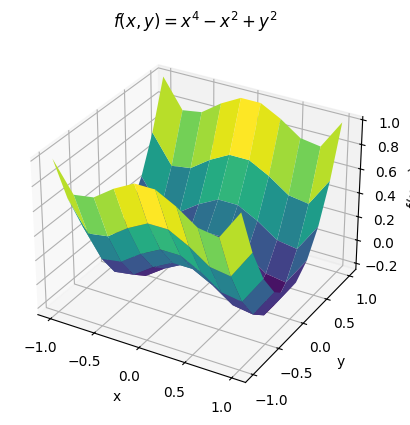

In [39]:
def f(x: np.ndarray[np.double]) -> np.double:
    return x[0]**4 - x[0]**2 + x[1]**2

x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)

X, Y = np.meshgrid(x, y)

Z = f([X, Y])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title("$f(x,y) = x^4 - x^2 + y^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

plt.show()

In [41]:
def df(x: np.ndarray[np.double]) -> np.ndarray[np.double]:
    return np.array([
        4*x[0]**3 - 2*x[0],
        2*x[1]
    ])

def d2f(x: np.ndarray[np.double]) -> csr_matrix:
    return csr_matrix([
        [12*x[0]**2 - 2, 0],
        [0, 2]
    ])

x, iter = trust_region_newton_cg(
    f, df, d2f,
    np.array([0., 0.]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [0. 0.]
Number of iterations: 1
Gradient of f(x, y): [0. 0.]
Eigenvalues of Hessian f(x,y): [-2.  2.]


In [42]:
x, iter = trust_region_newton_cg(
    f, df, d2f,
    np.array([0.000001, 0.000001]), 
    10**-9,
    100000
)

print(f'Solution: {x}')
print(f'Number of iterations: {iter}')
print(f'Gradient of f(x, y): {df(x)}')

H = d2f(x)

lam, _ = np.linalg.eigh(H.toarray())

print(f'Eigenvalues of Hessian f(x,y): {lam}')

Solution: [0.70710678 0.        ]
Number of iterations: 6
Gradient of f(x, y): [2.22044605e-16 0.00000000e+00]
Eigenvalues of Hessian f(x,y): [2. 4.]
